In [2]:
#Importing library
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np
seed = 1000
np.random.seed(seed)

#Instantiation
AlexNet = Sequential()

#1st Convolutional Layer
# 请你填写 kernel_size=( , ) strides=( , )
AlexNet.add(Conv2D(filters=96, input_shape=(32,32,3), kernel_size=( , ), strides=( , ), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convolutional Layer
# 请你填写  filters= , kernel_size=( ,  )
AlexNet.add(Conv2D(filters= , kernel_size=( ,  ), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
# 请你填写  filters= , kernel_size=( ,  )
AlexNet.add(Conv2D(filters= , kernel_size=( , ), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#4th Convolutional Layer
# 请你填写  filters= , kernel_size=( ,  )
AlexNet.add(Conv2D(filters= , kernel_size=( , ), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#5th Convolutional Layer
# 请你填写  filters= , kernel_size=( ,  )
AlexNet.add(Conv2D(filters= , kernel_size=( , ), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
AlexNet.add(Flatten())
# 1st Fully Connected Layer
AlexNet.add(Dense(4096, input_shape=(32,32,3,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Add Dropout to prevent overfitting
AlexNet.add(Dropout(0.4))

#2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#3rd Fully Connected Layer
AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#Output Layer
AlexNet.add(Dense(10))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))

#Model Summary
AlexNet.summary()

NameError: name 'AlexNet' is not defined

In [ ]:
# Compiling the model
AlexNet.compile(loss = keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])

In [3]:
import keras
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_test[10].shape)

Using TensorFlow backend.


170500096/170498071 [==============================] - 60s 0us/step
(32, 32, 3)


In [4]:
y_test[11]

array([9])

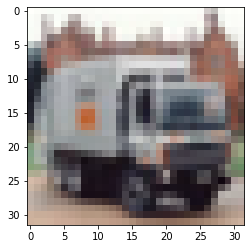

In [5]:
import matplotlib.pyplot as plt

plt.imshow(x_test[11])
plt.show()

In [7]:
#Onehot Encoding the labels.
from sklearn.utils.multiclass import unique_labels
from keras.utils import to_categorical

#Since we have 10 classes we should expect the shape[1] of y_train,y_val and y_test to change from 1 to 10
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

#Verifying the dimension after one hot encoding
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

ModuleNotFoundError: No module named 'sklearn'

In [8]:
#Image Data Augmentation
from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True,zoom_range=.1 )

val_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True,zoom_range=.1)

test_generator = ImageDataGenerator(rotation_range=2, horizontal_flip= True,zoom_range=.1)

#Fitting the augmentation defined above to the data
train_generator.fit(x_train)
val_generator.fit(x_val)
test_generator.fit(x_test)

NameError: name 'x_val' is not defined

In [10]:
#Learning Rate Annealer
from keras.callbacks import ReduceLROnPlateau
lrr= ReduceLROnPlateau(monitor='val_loss',   factor=.01,   patience=3,  min_lr=1e-5) 

In [11]:
#Defining the parameters
batch_size = 16
epochs = 2
learn_rate = .001

In [12]:
#Training the model
AlexNet.fit_generator(train_generator.flow(x_train, y_train, batch_size=batch_size), 
                      epochs = epochs, 
                      steps_per_epoch = x_train.shape[0]//batch_size, 
                      validation_data = val_generator.flow(x_val, y_val, batch_size=batch_size), 
                      validation_steps = 250, verbose=1)

NameError: name 'AlexNet' is not defined

In [13]:
#Making prediction
y_pred = AlexNet.predict_classes(x_test)
y_true = np.argmax(y_test,axis=-1)

#Classification accuracy
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_true, y_pred)
print('Accuracy Score = ', acc_score)

NameError: name 'AlexNet' is not defined